<a href="https://colab.research.google.com/github/ardayekh/ProfessionalDataEngineer/blob/main/Building_Batch_Data_Pipelines_on_GCP_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red">**--------------------[Week1 - Day1]--------------------**

<font color='green'>**Video#3: EL, ELT, ETL**
- EL: Extract and load data without any transofrmation. Example is when source and target have the same schema. Used shen data is laready clean and correctn (batch load of historical data, scheduled loag of log files etc.).
- ELT: Loading raw data into the target then transofrm it wherever needed. For example, you might provide access to the raw data through a view that determines whether a user wants to see all transactions or only reconciled ones. Used in experimental datasets where you're not usre yet what ransformatios are needed to make data usable. Also, usen when any transformation to the dataset can be exepressed in SQL (loading from cloud storage to BigQuery then doing the transformation on the fly).
- ETL: Transfomration takes place in an intermediate service before it is loaded into the target.

<font color='green'>**Video#4: Quality considerations**
- DQ considerations: below DQ dimensions are independent of each other (can be valid without being complete)

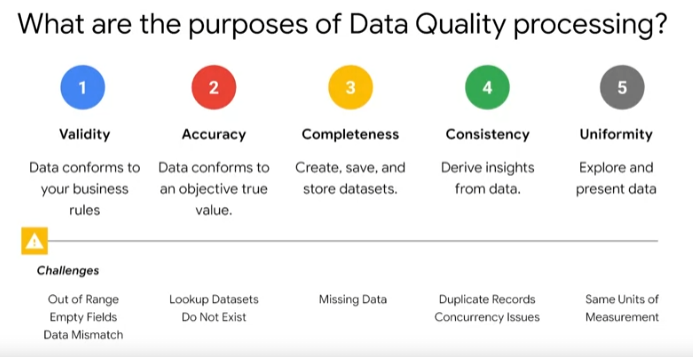

<font color='green'>**Video#5: How to carry out operations in BigQuery**
- Validity DQ issues occur whenever the data does not conform to your specific business rules
- Consistency DQ issue occurs whenever computations from your data is incorrect. consistency problems are often due to duplicates. You expect that something is unique and it isn't so many things like totals are wrong.
- Accuracy: accuracy can also be a lookup issue if some data doesn't conform to some objective true value. For accuracy, test a data against known good values. For example if you have an order you could compute the subtotal from quantity ordered and item price and make sure that the math checks out. Similarly, you can check if a value that is being inserted belongs to a canonical list of acceptable values.
- For completeness, identify any missing values and either filter it out or replace it by something reasonable. If the missing value is NULL, SQL provides functions like NULLIF, COUNTIF and COALESCE to filter them out of the calculations.  You might be able to do a union from another source to fill out missing months of data. The automatic process of detecting Data drops and requesting data items to fill in the gaps is called backfilling.
- In the fifth dimension uniformity, this one is usually an issue that isn't in the data itself. What happens if you're storing some value in centimeters and suddenly you start getting the value in millimeters. Your data Warehouse will end up with a non-uniform data and you've got to safeguard against this. Use SQL: CAST to avoid issues with datatypes changing within a table

<font color='green'>**Video#6: Shortcomings**
- When the transformation is too complex to be done is SQL (such as transofrmation required an API to translate Spanish to English), you have to transofrm before loading inot BigQuery.
- On GCP, Google recommends Cloud Dataflow for ETL jobs. The crchitecture looks like this

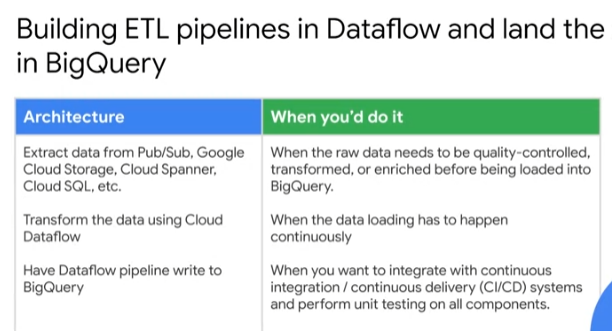

- Other data transformation tools on GCP are Cloud Dataproc (based on Apache Hadoop and requires Hadoop expertise) and Cloud Data Fusion (a simple to use graphical interface to build ETL pipelines that can then be easily deployed at scale to Cloud Dataproc clusters).
- Cloud Dataflow is a fully-managed serverless data processing service based on Apache Beam that supports both batch and streaming data processing pipelines. While significant Apache Beam expertise is desirable in order to leverage the full power of Cloud Dataflow, Google also provides QuickStart templates for Cloud Dataflow to allow you to rapidly deploy a number of useful data pipelines. 

<font color='green'>**Video#7: ETL to solve data quality issues**
- When to look beyond the recommended approach of Cloud Dataflow and Bigquery. See below:

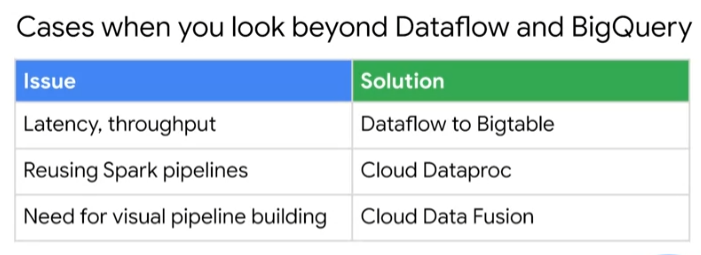

- Regardless of which ETL you use, Dataflow, Dataproc or Data Fusion, there are some crucial aspects to keep in mind.
 - Maintain Data Lineage
 - Maintain metadata (for example by using labels on datasets and views, computer engines, pipelines, buckets to manage resources - Labels are a first step toward a data catalog.).Think of Data Catalog as a metadata as a service. It provides metadata management services for cataloging data assets via custom APIs and the UI, thereby providing a unified view of data wherever it is.

#<font color="red">**--------------------[Week1 - Day2]--------------------**

<font color='green'>**Video#1: The Hadoop ecosystem**
- Agenda:
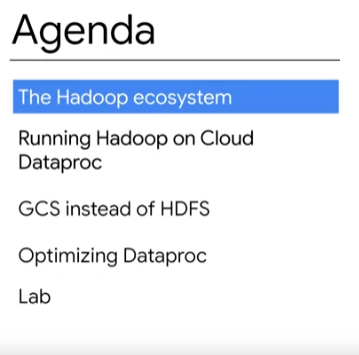![image.png](
  
)

- In the past, storage was cheap and processing was expensive which made it sensible to have DBs for storage, move the data for processing then copy back to the DBs
- Then Hadoop allowed for disctributed processing and storage (data stored with processors on clusters of servers and mapreduce provided distributed processing or compute over all of that data)
- Organizations use Hadoop for on-premises big data workloads using distributed data processing via MapReduce. They make use of a range of applications that run on Hadoop clusters, such as Presto. But a lot of customers also use Spark.
- Spark provides a high-performance analytics engine for processing batch and streaming data. Spark can be up to a hundred times faster than equivalent Hadoop jobs, because it leverages in-memory processing. Spark also provides a couple of abstractions for dealing with data, including resilient distributed data sets and data frames. Spark in particular is very powerful and expressive.
- the Hadoop system has to be tuned for the kind of job being run to make efficient use of the underlying hardware
- Imagine a job working on millions of pieces of sensor data coming in from an internet of things or IoT application. And then imagine a job working on those huge photos from our previous example. Trying to do both things at the same time time efficiently is really complicated.
-  simple explanation of Spark is that it's able to mix different kinds of applications and to adjust how it uses the available resources on your cluster.
- You have to learn to program Spark differently from traditional programming, because you can't tell it how exactly to do things. To give spark the flexibility it needs to determine how to use the resources that are available you have to describe what you want to do and let spark determine how it actually does it to make it happen. This is called declarative programming versus imperative programming
- n imperative programming, you tell the system exactly what to do and how to do it. In declarative programming, you tell the system what you want and it figures out how to actually do the implementation.
- Hadoop clusters store their data within the Hadoop Distributed File System HDFS
- HDFS is the main file system Hadoop uses for distributing work to the nodes on its cluster. It's part of the cluster, which means even if you're not running jobs that use the compute hardware on the cluster, you still have to pay for that power for the cluster to persist all of that storage. This is the disadvantage of tying together compute and storage.
- the yarn utility hadoope provides is used to manage the distributed system resources

Some components of the Hadoop ecosystem shown below

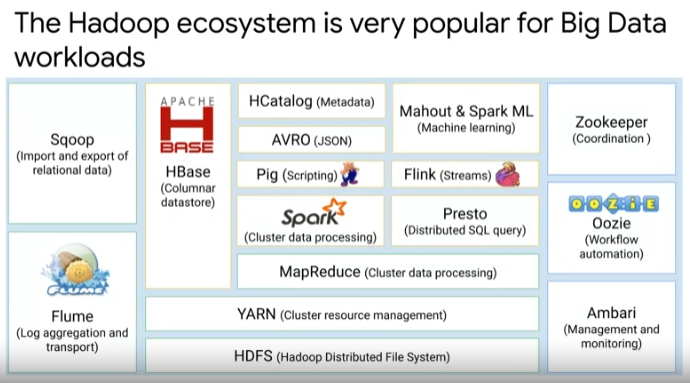

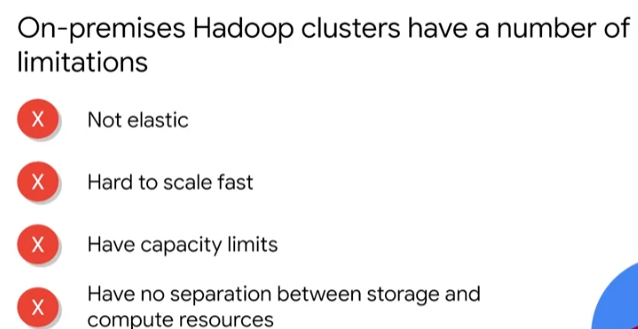

- Advantages of running hadoop clusters on Cloud Dataproc

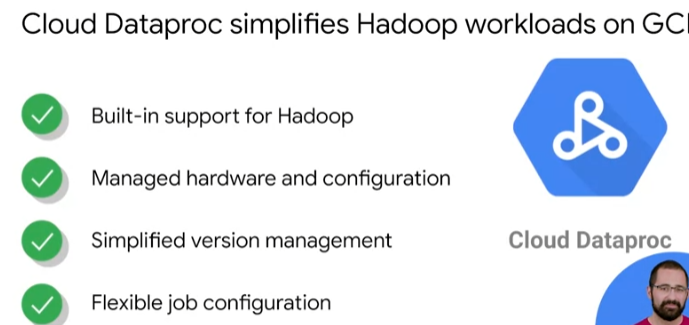

<font color ='green'>**Video#2: Running Hadoop on Cloud Dataproc**
- Advantages of running hadoop and spark workloads on Cloud Dataproc
 - you use for resources only when you need them
 - Clusters can be created and scaled quickly with a variety of virtual machine types, disc sizes, numbers of nodes and different networking options
 - Open source ecosystem allows you to use hadoop and spark libraris making it possible to move existing procets or ETL pipeline without redevelping any code.
 - Integrated with other GCP services such as Cloud Storage, Cloud Bigtable and BigQuery

 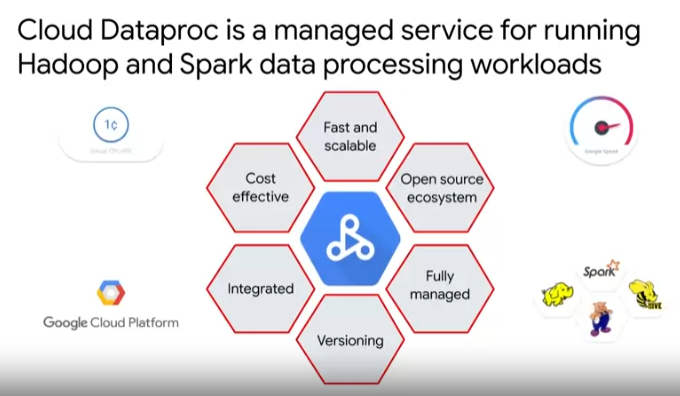

- you can easily interact with clusters in Spark or Hadoop jobs without the assistance of an administrator or special software. Through the GCP console the cloud SDK or the Cloud Dataproc REST API
- you can customize cluster through wither optional components or through initialization actions
Pre-configured optional componeents can be selected when deployed through the google cloud console or through the command line
- Optional components inlcude Jupyter Notebook, Presto and others
- Initialization actions lets you customize clusters by running a script right after the cluster is setup. You can write you own script or choose from a wide range of frequently used ones
-here are a lot of pre-built startup scripts that you can leverage for common Hadoop cluster set of tasks like Flink, Jupyter and more. You can check out the GitHub repo link to learn more.

- Cluster architecture
- The standard setup architecture is much like you would expect on-premise. You have a cluster of virtual machines for processing and then persistent disks for storage via HDFS.
- he advantages here is that you'll soon see in your lab. You can spin up more VMS than you need to automatically resize your cluster based on the demands.
- Storage off cluster (e.g. Cloud Storage) allows you to turn off the cluster when not in use

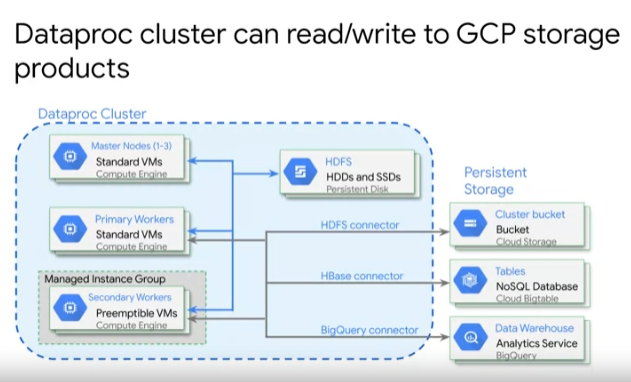


- It's pretty easy to adapt existing Hadoop code to use GCS instead of HDFS. It's just a matter of changing the prefix for this storage from hdfs// to gs//.
- Using Cloud Dataproc involves this sequence of events, Setup, Configuration, Optimization, Utilization and monitoring.
- You can setup/create a cluster using a YAML file, or export a YAML file from an existing cluster and use it to setup another cluster

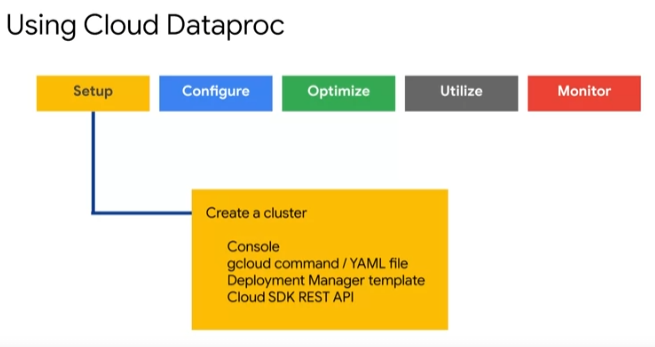

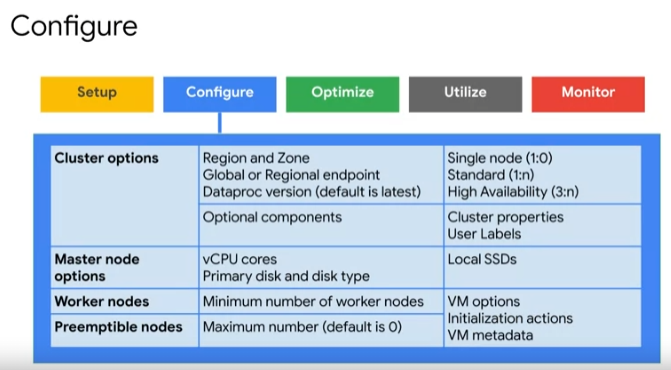

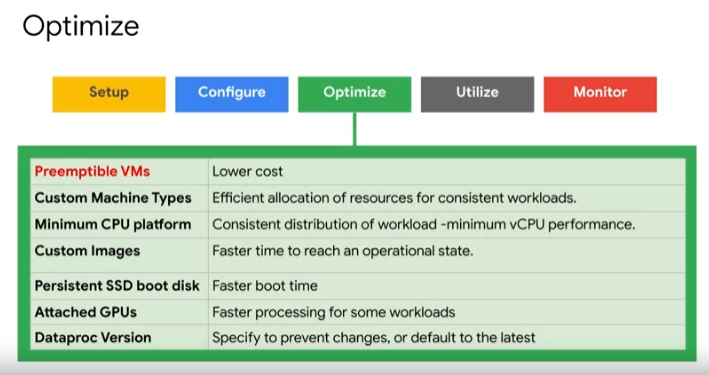

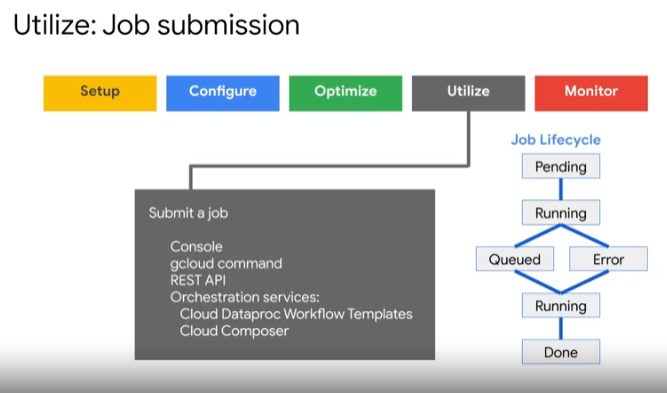

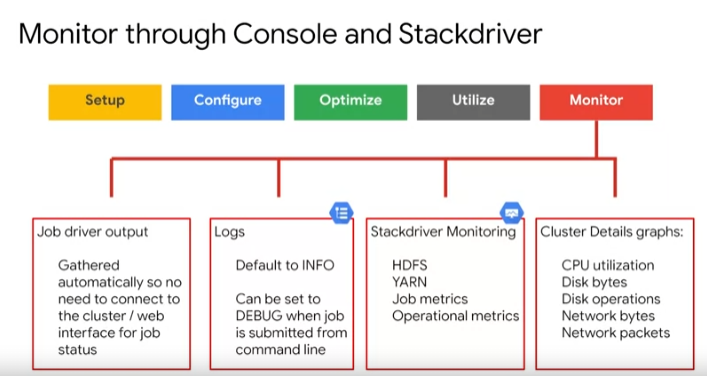

<font color='green'>**Video#3: GCS instead of HDFS**
- In GCP, the massive distributed storage layer is called Colossus and the network inside the datacenter is called Jupiter
- Make sure that the GCS is in the same region as the Cloud Dataproc for optimum performance

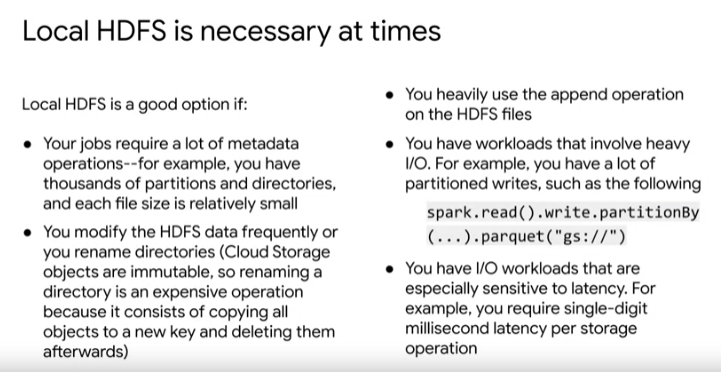

- The cloud dataproc workflow template is a YAML file that's processed through a directed acyclic graph or DAG. It can create a new cluster, select from existing cluster, submit jobs, hold jobs for submission until dependencies can complete, and it can also delete a cluster when a job is done.

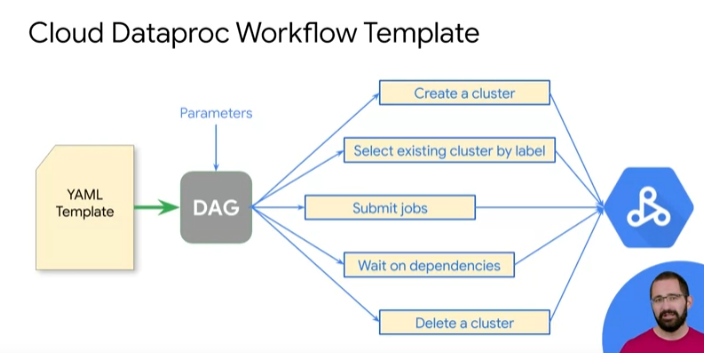

- example of a of a cloud data proc workflow template

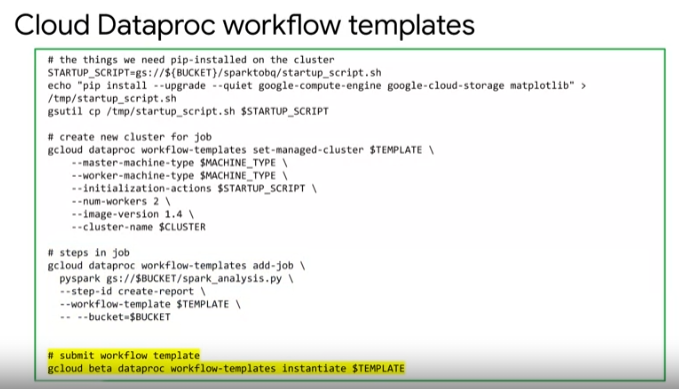

<font color='green'>**Lab: Running Apache Spark jobs on Cloud Dataproc**

- step 1: create Cloud Data proc cluster (enabling the Jupyter optional componenet since spark job exists on a Jupyter notebook)
- Step 2: copy git repo containing job code to GCS using Cloud shell
  clone git repo: git -C ~ clone https://github.com/GoogleCloudPlatform/training-data-analyst

  locate GCS bucket used by cloud dataproc cluster: gsutil -m cp ~/training-data-analyst/quests/sparktobq/*.ipynb $DP_STORAGE/notebooks/jupyter

  copy files to GCS: gsutil -m cp ~/training-data-analyst/quests/sparktobq/*.ipynb $DP_STORAGE/notebooks/jupyter

- step 3: open jupyter by clicking on cluster name and clicking Jupyter under "Web Interfaces"

- Step 4: run script